![header](../header.png)

# Guia de Processamento Digital de Imagens em linguagem de programação Python

## Estudo de caso em Reconhecimento Automático de Placas Veiculares

### Descrição

Esse guia é composto de diversos notebooks que têm por principal objetivo apresentar o desenvolvimento de algoritmos em linguagem python com uso da biblioteca de visão computacional OpenCV. Para isso, toma como exemplo um estudo de caso em reconhecimento automático de placas veiculares. As imagens utilizadas são do [SSIG-ALPR Database](http://www.smartsenselab.dcc.ufmg.br/ssig-alpr-database).

### Notebook número 6

Esse notebook tem por objetivo demonstrar métodos de realizar a **segmentação por limiarização**. Os métodos abordados serão:

- Método empírico de definição de limiar global
- Método de definição de limiar global por análise humana de histograma 
- Método de definição de limiar global por Otsu
- Método de definição de limiar local ou adaptativo por gaussiana
- Método de definição de limiar local ou adaptativo por média

Nesse caso, o primeiro passo a ser dado é a importação das bibliotecas, a definição das funções úteis e a leitura das imagens.

In [2]:
import numpy as np
import cv2
from os import listdir, path
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline  

In [3]:
# Funcoes uteis 

# Funcao de leitura de imagens
def pdiguide_imgRead(path,convert=True,show=False):
    # Essa funcao cria uma lista de imagens dado o caminho (path) de um diretório.
    # Se "convert" é Verdadeiro, a função irá realizar a conversão das imagens de RGB para Grayscale
    # Se "show" é Verdadeiro, a função irá exibir as imagens carregadas
    
    img = [] # lista de imagens em tons de cinza

    number_of_files = len(listdir(path))#a função listdir forma uma lista com todos os arquivos

    if(show):
        plt.figure(figsize=[20,10]) #define a existencia de uma figura e define o seu tamanho

    #A cada iteração uma imagem é carregada e convertida para tons de cinza, 
    #ao passo que é armazenada nos vetores acima
    for i in range(0,number_of_files): 
        img.append(cv2.imread(path + str(i+1) + '.png'))
        if(convert):
            img[i]=(cv2.cvtColor(img[i],cv2.COLOR_RGB2GRAY))

        #Exibe as imagens
        if(show):
            plt.subplot(1+number_of_files/5,5,i+1)
            plt.imshow(img[i],cmap='gray'),plt.xticks([]),plt.yticks([]) 
            #xticks e yticks controlam as escalas exibidas, nesse caso, serão nulas.
            
    print("Leitura finalizada, total de imagens lidas = ",len(img))
    return img #retorna a lista de imagens
    
# Funcao apenas para exibicao da lista de imagens
def pdiguide_show(list_of_imgs):
    # Essa funcao exibe as imagens dado uma lista de imagens.
    number_of_files = len(list_of_imgs)
    plt.figure(figsize=[20,10]) 
    for i in range(0,number_of_files): 
        plt.subplot(1+number_of_files/5,5,i+1)
        plt.imshow(img[i],cmap='gray'),plt.xticks([]),plt.yticks([]) 
        
# Funcao para calcular e exibir o histograma de uma imagem 
def pdiguide_histogram(img,nbins,show=False):
    # Essa funcao calcula o histograma de um vetor 2D (imagem grayscale)
    # com valores inteiros entre 0-255.
    # Essa imagem retorna um vetor 1D com o histograma e os pontos 
    # que representam o bin_edges para plotagem do histograma.
    # Caso show seja verdadeiro ela mesmo irá plotar o histograma
    h, bin_edges = np.histogram(img.ravel(), nbins,(0,255))
    if show:
        w=256./nbins
        bin_centers = bin_edges[1:]-(w/2)
        plt.bar(bin_centers, h, width=w)
    
    return h, bin_edges

In [4]:
# Leitura das imagens
path = '../Data/'
img = pdiguide_imgRead(path)

Leitura finalizada, total de imagens lidas =  20


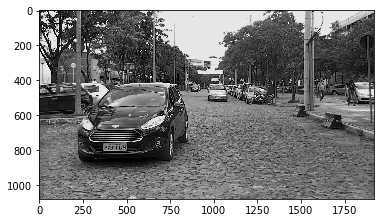

In [30]:
# Utilizando somente a imagem 0 
im = img[0]
plt.imshow(im,cmap='gray')

### Segmentação de Imagens - Limiarização

A segmentação de imagens é o processo de identificação de pixels com características
similares através de rótulos ou etiquetas. Os pixel rotulados com uma mesma etiqueta
representam um objeto. Em outras palavras a segmentação é responsável por distinguir os
objetos de uma imagem do fundo ou distinguir um objeto do outro. (CHIPANA; IANO,
2010).

Nesse material serão abordados as seguintes formas de segmentação:

- Segmentação por Limiar (Notebook 6)
- Segmentação por Formas: Transformada de Hough (Notebook 7)
- Segmentação por Região: Watershed (Notebook 8)

Alguns autores classificam ainda os *Detectores de descontinuidades*, como as bordas, como algoritmos de segmentação (SALDANHA;FREITAS,2009). Nesse notebook serão abordados apenas os algoritmos de segmentação por limiar.

Esta é a forma mais simples e uma das mais importante de segmentar uma imagem.
Para essa abordagem , o objeto é considerado uma região de pixels que tenham em comum
uma faixa de intensidades. Assim, a limiarização utiliza somente a intensidade dos pixels
para distinguir as regiões (SALDANHA; FREITAS, 2009).

A limiarização pode ser feita a partir da determinação de um limiar, em que os
pixels acima daquele limiar vão possuir uma valor de intensidade e os abaixo outro valor.
Ela pode acontecer de em 2 ou mais nível, sendo a limiarização em dois níveis a mais
utilizada. Na limiarização em dois níveis os pixels abaixo do limiar recebem o valor de
intensidade zero e os pixels acima recebem o valor de limiar um ou o máximo valor possível
(Exemplo, por pixels do representados por 1 bytes de variáveis inteiras positivas (uint8) o
valor máximo para o pixel é 255). Já as limiarizações com dois ou mais níveis definirão
mais valores de limiares para segmentar a imagem em mais de um grupo ou nível.

Quando um único limiar é aplicado sobre toda a imagem diz-se que esse limiar é
global. Ao passo que, quando definimos um limiar para uma parte ou janela da imagem,
tem-se uma limiarização local ou adaptativa. 

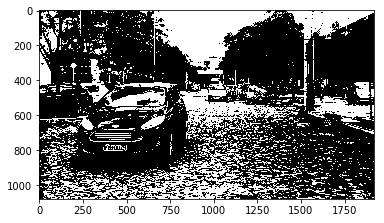

In [7]:
# Técnica de limiarização global limiar definido empiricamente

limiar = 127 #valor central do intervalo de 0 a 255
_,img_segmentada = cv2.threshold(im,limiar,255,cv2.THRESH_BINARY)

plt.imshow(img_segmentada,cmap='gray')

Observe que a imagem segmentada é uma imagem binária, isto é, só possui dois valores de intensidade de pixel, no caso 0 e 255. 

Para realizar a limiarização utilizou-se a função do OpenCV *cv2,threshold()* nela definimos um valor de limiar e o valor máximo que os pixels poderão assumir. O último valor é uma constante que define o tipo de binarização que será realizada, podendo ser uma binarização padrão, inversa, truncada, entre outras.

Para observar os efeitos do limiar na segmentação, vamos utilizar um laço de for para variar esse parâmetro.

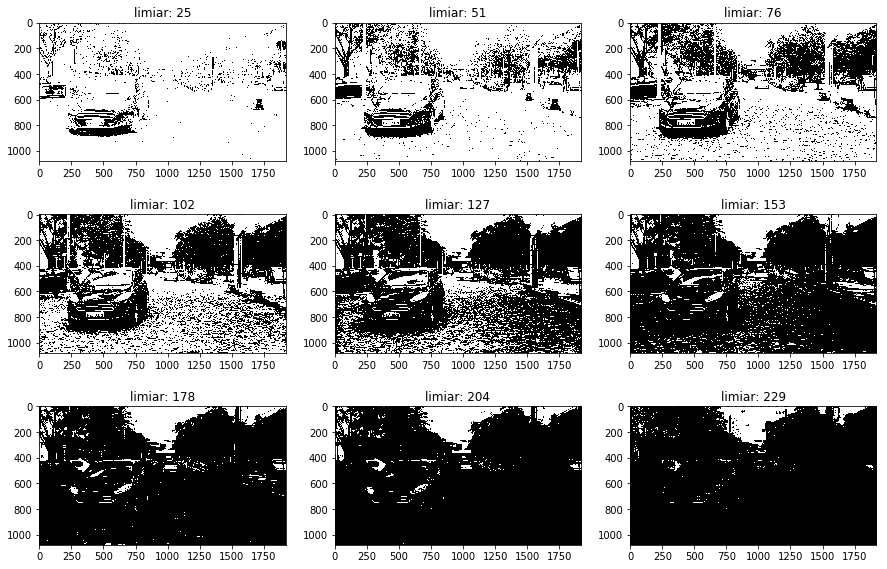

In [14]:
plt.figure(figsize=(15,10))
for i in range(1,10):
    limiar = int(255*i/10.0)
    _,img_segmentada = cv2.threshold(im,limiar,255,cv2.THRESH_BINARY)
    
    plt.subplot(3,3,i)
    plt.imshow(img_segmentada,cmap='gray')
    plt.title('limiar: '+ str(limiar))

Para a limiarização global é comum utilizar o histograma como caminho para definir o valor do limiar. Imagens que apresentam histograma constituido por dois pico com um vale entre eles são ideias para essa técnica, bastando apenas selecionar o valor de intensidade que representa o ponto mínimo do vale.

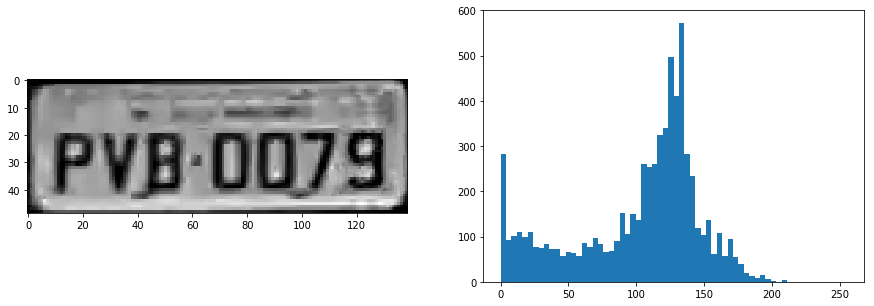

In [22]:
plate = im[756:805,366:505] # esses valores foram obtidos observando a imagem acima
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(plate,cmap='gray')
plt.subplot(1,2,2)
h, bin_edges = pdiguide_histogram(plate,64,True)

No exemplo acima, apesar do histograma não apresentar dois picos bem definimos percebemos que o existe uma região concentrada de pixels entre 100 e 150, que representa os tons ciza da placa. Abaixo disso, principalmente no valor 0 estão os pixels pretos dos caracteres e da borda da imagem. Para testar, Um bom valor de limiar a se tomar está na faixa de 40 a 100, vamos escolher o valor 50.

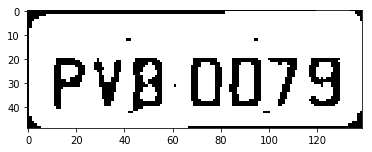

In [28]:
# Técnica de limiarização global limiar definido análise humana de histograma
limiar = 50 
_,plate_segmentada = cv2.threshold(plate,limiar,255,cv2.THRESH_BINARY)

plt.imshow(plate_segmentada,cmap='gray')

A forma automática de otimização limiar mais comum é a utilização do método
de Otsu (OTSU, 1979). De modo geral o método Otsu aplica todos os possíveis
 valores de limiar sobre o histograma de uma imagem e determina como ótimo aquele cujas
as classes formadas possuem a maior variância entre elas considerando apenas os valores
de intensidade dos pixels (GONZALEZ; WOODS, 2006).

Limiar por Otsu para a imagem completa = 110.0
Limiar por Otsu para a imagem da placa = 79.0


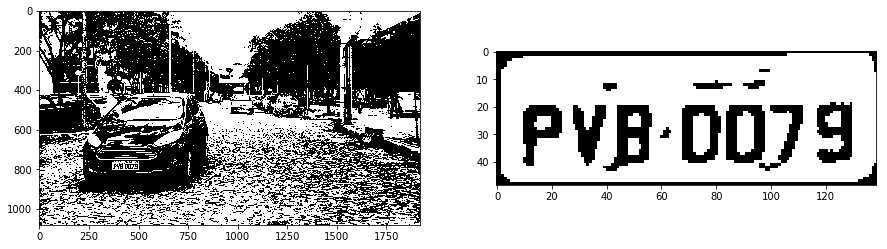

In [29]:
# Técnica de limiarização global limiar definido por Otsu

valor_de_otsu, img_segmentada = cv2.threshold(im,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('Limiar por Otsu para a imagem completa =',valor_de_otsu)
valor_de_otsu, plate_segmentada = cv2.threshold(plate,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('Limiar por Otsu para a imagem da placa =',valor_de_otsu)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(img_segmentada,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(plate_segmentada,cmap='gray')

Regiões diferentes da imagem podem ser melhor segmentadas se o limiar for diferente. Em outras palavras, pode-se obter melhores segmentações quando o limiar varia conforme a região da imagem na qual ele é aplicado. Como no exemplo acima o limiar ótimo de Otsu para a imagem inteira foi 110 enquanto que para a região da placa o melhor limiar por Otsu é 79. 

A limiarização local ou adaptativa utiliza-se de algumas métricas para definir limiares para as regiões da imagem. Vamos explorar a aplicação da limiarização adaptativa com uso de duas métricas, a média e a gaussiana.

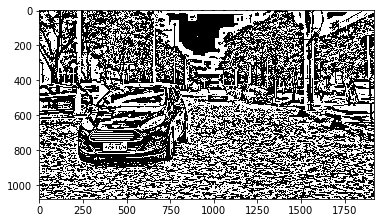

In [62]:
# Técnica de limiarização adaptativa por Media
img_segmentada = cv2.adaptiveThreshold(im,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,47,0)
plt.imshow(img_segmentada,cmap='gray')

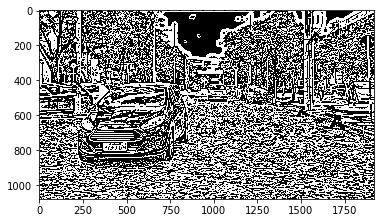

In [65]:
# Técnica de limiarização adaptativa por Gaussian
img_segmentada = cv2.adaptiveThreshold(im,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,47,0)
plt.imshow(img_segmentada,cmap='gray')

O parâmetro da função *cv2.adaptiveThreshold()* representado pelo número 47 é o tamanho da máscara utilizada para definir uma região. Observa-se que esse tamanho é fundamental para o sucesso da segmentação. Veja que para o valor 47 elementos dessa grandeza foram bem segmentados, como placa e farol do carro. Entretanto, elementos fora dessa grandeza obtiveram resultados ruins como o carro inteiro e os caracteres da placa.

O parâmetro setado como zero é uma constante que pode ser subtraída do valor obtido após a aplicação da métrica definida. Os demais parâmetros, com exceção daquele que define a métrica de obtenção do limiar local, são os mesmo da função *cv2.threshold()*.

### Referências